In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("train.csv")

In [5]:
test = pd.read_csv("test.csv")

In [6]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:>

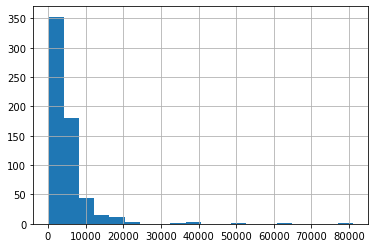

In [9]:
df['ApplicantIncome'].hist(bins=20)

In [10]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:>

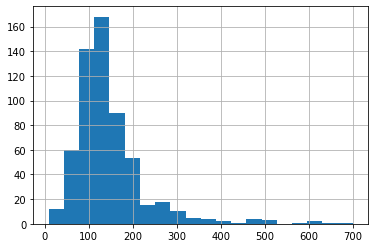

In [13]:
df['LoanAmount'].hist(bins=20)

<AxesSubplot:>

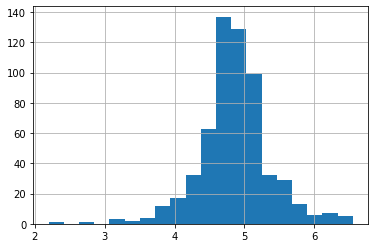

In [14]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

<AxesSubplot:>

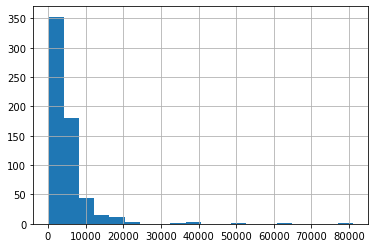

In [16]:
df['ApplicantIncome'].hist(bins=20)

In [17]:
df['Self_Employed'].fillna('No',inplace=True)

In [18]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
df['LoanAmount_log'] = np.log(df['LoanAmount'])


## Label Encoding the data

In [19]:
x = df.iloc[:,np.r_[1:5,9:11,13:14]].values
y = df.iloc[:,12].values

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

In [22]:
for i in range(0,5):
    x_train[:,i] = labelencoder_x.fit_transform(x_train[:,i])
    

In [23]:
x_train[:,6]=labelencoder_x.fit_transform(x_train[:,6])

In [24]:
labelencoder_y=LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [25]:
for i in range(0,5):
    x_test[:,i] = labelencoder_x.fit_transform(x_test[:,i])

In [26]:
x_test[:,6]=labelencoder_x.fit_transform(x_test[:,6])

In [27]:
labelencoder_y=LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [28]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

## Decision Tree Analysis

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
DTClassifier = DecisionTreeClassifier(criterion="entropy",random_state = 0)
DTClassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
y_pred = DTClassifier.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [31]:
print("The accuracy of decesion tree is : ", metrics.accuracy_score(y_pred,y_test)*100,"%")

The accuracy of decesion tree is :  70.73170731707317 %


# Naïve Bayes' Classifier

In [33]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(x_train,y_train)

GaussianNB()

In [34]:
y_pred = NBClassifier.predict(x_test)

In [35]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [36]:
print('The accuracy of Naive Bayes is :',metrics.accuracy_score(y_pred,y_test))

The accuracy of Naive Bayes is : 0.8292682926829268


In [37]:
for var in cat:
    le = preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
Loan_Status           object
LoanAmount_log       float64
dtype: object

## Logistic Regression

In [38]:
df['Type']='Train' 
test['Type']='Test'
fullData = pd.concat([df,test], axis=0)
fullData.isnull().sum()

Loan_ID                0
Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        29
Property_Area          0
Loan_Status          367
LoanAmount_log       389
Type                   0
dtype: int64

In [39]:
ID_col = ['Loan_ID']
target_col = ["Loan_Status"]
cat_cols = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']

In [40]:
fullData['LoanAmount'].fillna(fullData['LoanAmount'].mean(), inplace=True)
fullData['LoanAmount_log'].fillna(fullData['LoanAmount_log'].mean(), inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mean(), inplace=True)
fullData['ApplicantIncome'].fillna(fullData['ApplicantIncome'].mean(), inplace=True)
fullData['CoapplicantIncome'].fillna(fullData['CoapplicantIncome'].mean(), inplace=True)
fullData['Gender'].fillna(fullData['Gender'].mode()[0], inplace=True)
fullData['Married'].fillna(fullData['Married'].mode()[0], inplace=True)
fullData['Dependents'].fillna(fullData['Dependents'].mode()[0], inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mode()[0], inplace=True)
fullData['Credit_History'].fillna(fullData['Credit_History'].mode()[0], inplace=True)

In [41]:
fullData['TotalIncome']=fullData['ApplicantIncome'] + fullData['CoapplicantIncome']
fullData['TotalIncome_log'] = np.log(fullData['TotalIncome'])

In [42]:
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))

train_modified=fullData[fullData['Type']=='Train']
test_modified=fullData[fullData['Type']=='Test']
train_modified["Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype('str'))

<ipython-input-42-a2032fbbc71f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_modified["Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype('str'))


In [43]:
from sklearn.linear_model import LogisticRegression


predictors_Logistic=['Credit_History','Education','Gender']

x_train = train_modified[list(predictors_Logistic)].values
y_train = train_modified["Loan_Status"].values

x_test=test_modified[list(predictors_Logistic)].values

In [44]:
from sklearn import metrics



def classification_model(model, data, predictors, outcome):
    
    model.fit(data[predictors],data[outcome])
  
    
    predictions = model.predict(data[predictors])
  
   
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    print("Accuracy  : ", metrics.accuracy_score(y_pred,y_test)*100,"%")
    
   
    model.fit(data[predictors],data[outcome])
    

In [45]:
model = LogisticRegression()
model.fit(x_train, y_train)


predicted= model.predict(x_test)

predicted = number.inverse_transform(predicted)
test_modified['Loan_Status']=predicted

outcome_var = 'Loan_Status'

classification_model(model, df,predictors_Logistic,outcome_var)

test_modified.to_csv("Logistic_Prediction.csv",columns=['Loan_ID','Loan_Status'])

Accuracy : 80.945%
Accuracy  :  82.92682926829268 %


<ipython-input-45-076b2e562fc9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_modified['Loan_Status']=predicted
